<a href="https://colab.research.google.com/github/pri538/Deep-Learning-Project/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df = pd.read_csv("/content/student_prediction.csv")
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [ ]:
df.shape

(145, 33)

In [ ]:
df.describe().T.style.background_gradient(cmap = "Dark2")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


In [ ]:
attr_map = {
    'age': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'gender': {1: 'Female', 2: 'Male'},
    'hs_type': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'scholarship': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    },
    'work': {1: 'Yes', 2: 'No'},
    'activity': {1: 'Yes', 2: 'No'},
    'partner': {1: 'Yes', 2: 'No'},
    'salary': {
        1: '$135-200',
        2: '$201-270',
        3: '$271-340',
        4: '$341-410',
        5: 'Above $410',
    },
    'transport': {
        1: 'Bus',
        2: 'Private car/taxi',
        3: 'Bicycle',
        4: 'Other'
    },
    'living': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'mother_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'father_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'kids': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'mother_job': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'father_job': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'study_hrs': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'read_freq': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'read_freq_sci': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'attend_dept': {1: 'Yes', 2: 'No'},
    'impact': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'attend': {1: 'Yes', 2: 'No'},
    'prep_study': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'prep_exam': {
        1: 'Closest date to the exam',
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'notes': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'listens': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'likes_discuss': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'classroom': {
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'cuml_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'exp_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    }
}

In [ ]:
df.columns = [x.lower() for x in df.columns]
for col in df.columns.tolist():
    if col not in list(attr_map.keys()):
        continue
    if col == '#_siblings':
        df[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        df[col] = df[col].map(attr_map[col])
df.head()

,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,...,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,1
1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,1
2,22-25,Male,State,50%,No,No,No,$201-270,Other,Dormitory,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,1
3,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,Dormitory,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,1
4,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,Other,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,1


In [ ]:
df['grade'].mean()

3.2275862068965515

<ipython-input-44-576a8f532538>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-44-576a8f532538>:13: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


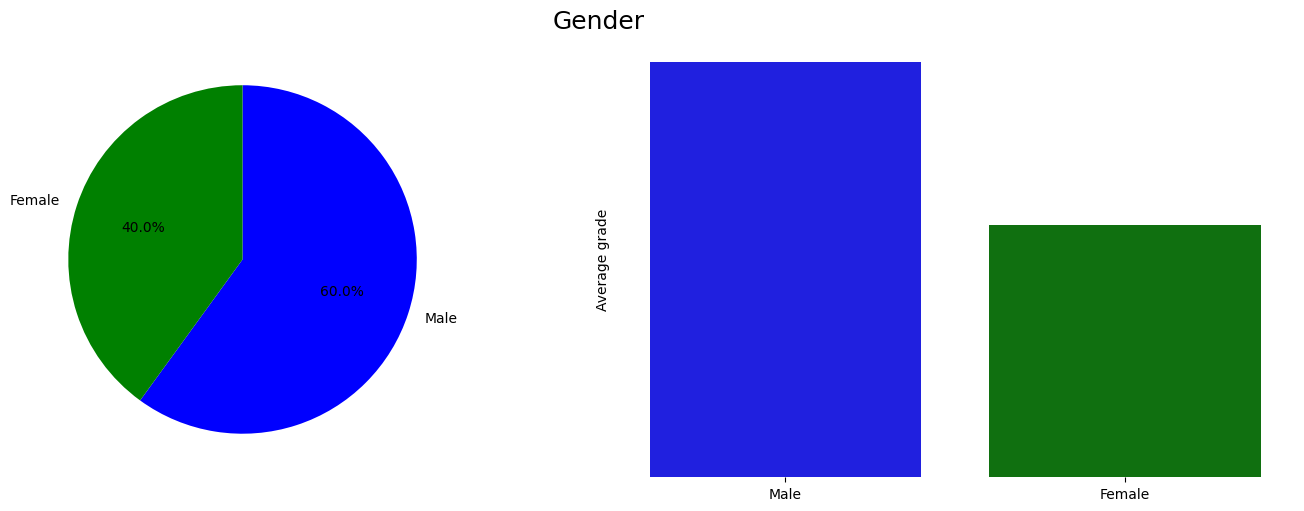

In [ ]:
import matplotlib.pyplot as plt
data = df['gender'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
palette = ['blue', 'green', 'red', 'yellow']
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('gender')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Gender', fontsize=18)
plt.show()

<ipython-input-46-e703e11437a4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-46-e703e11437a4>:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


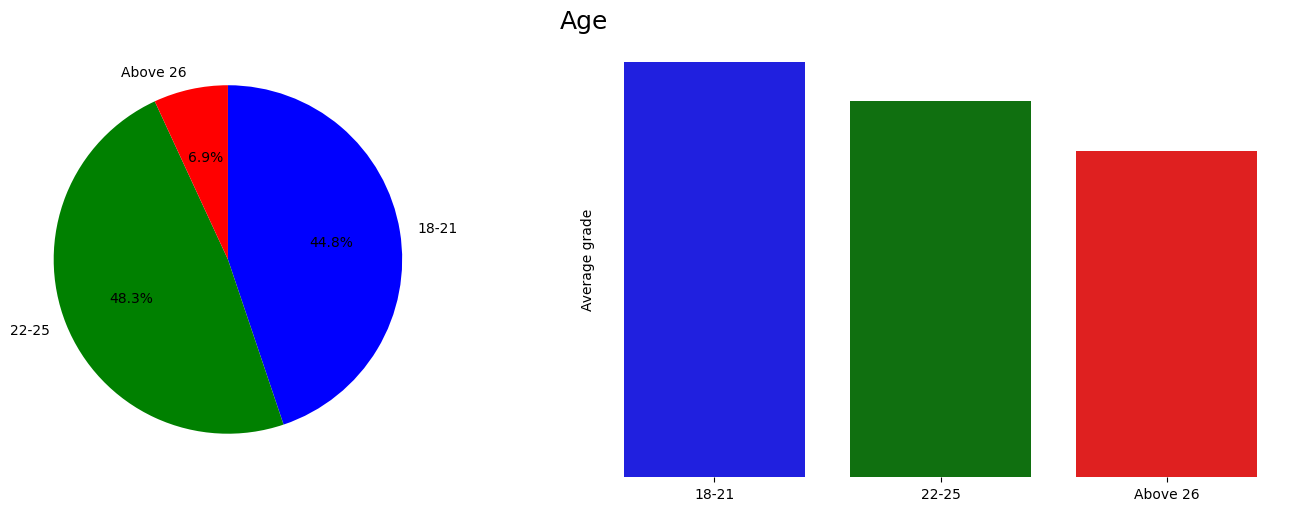

In [ ]:
order = list(attr_map['age'].values())
data = df['age'].value_counts(normalize=True) * 100
data = data.loc[order]
palette = ['blue', 'green', 'red', 'yellow']
fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('age')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Age', fontsize=18)
plt.show()

In [ ]:
df.describe(include=object)

,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,...,impact,attend,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa
count,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
unique,3,2,3,5,2,2,2,5,4,4,...,3,2,3,3,3,3,3,3,5,4
top,22-25,Male,State,50%,No,No,No,$135-200,Bus,Rental,...,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,3.00-3.49,2.50-2.99
freq,70,87,103,76,96,87,84,93,98,68,...,128,110,107,123,84,79,70,64,40,61


In [ ]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,...,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade


In [ ]:
df.rename(columns={'KIDS':'PARENTAL_STATUS'},inplace=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#_siblings,145.0,2.806897,1.360640,1.0,2.0,3.0,4.0,5.0
parental_status,145.0,1.172414,0.490816,1.0,1.0,1.0,1.0,3.0
course id,145.0,4.131034,3.260145,1.0,1.0,3.0,7.0,9.0
grade,145.0,3.227586,2.197678,0.0,1.0,3.0,5.0,7.0


In [ ]:
X = df.drop('grade', axis=1)
y = df['grade']

# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.model_selection import train_test_split

<ipython-input-119-0aba7351b77e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


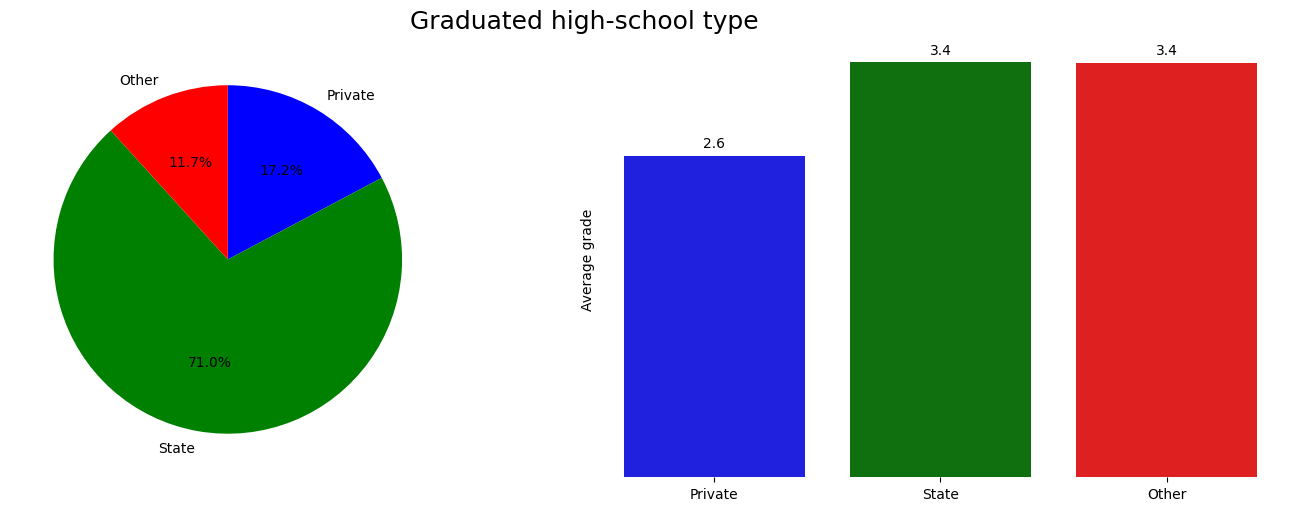

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')


order = list(attr_map['hs_type'].values())
data = df['hs_type'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('hs_type')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Graduated high-school type', fontsize=18)
plt.show()

<ipython-input-118-0ea353edb898>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-118-0ea353edb898>:21: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


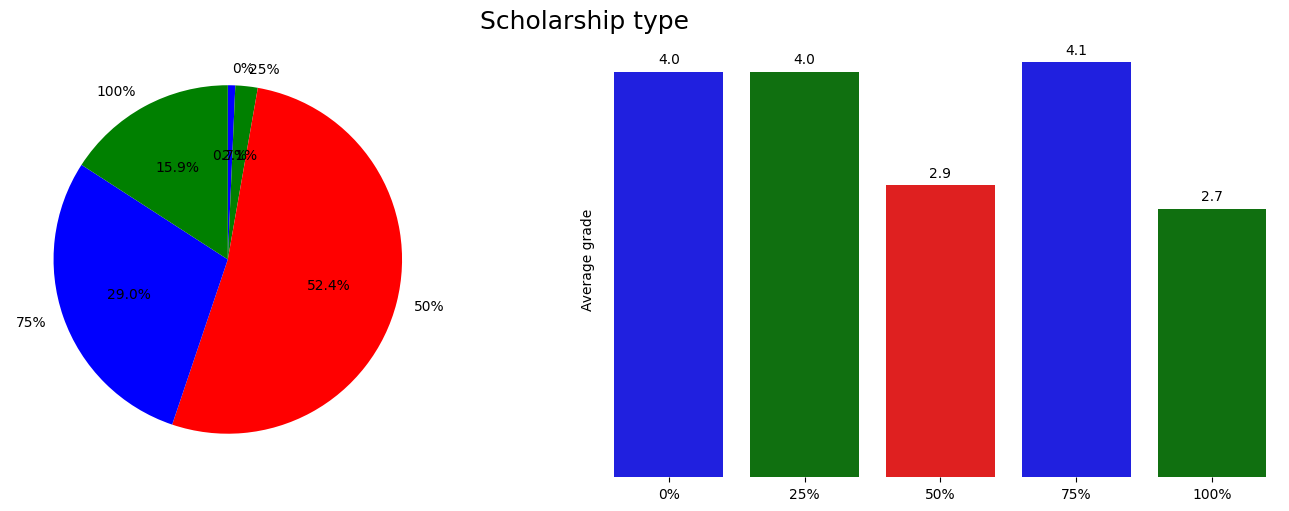

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['scholarship'].values())
data = df['scholarship'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('scholarship')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Scholarship type', fontsize=18)
plt.show()

<ipython-input-117-c03bf586f0b9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-117-c03bf586f0b9>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


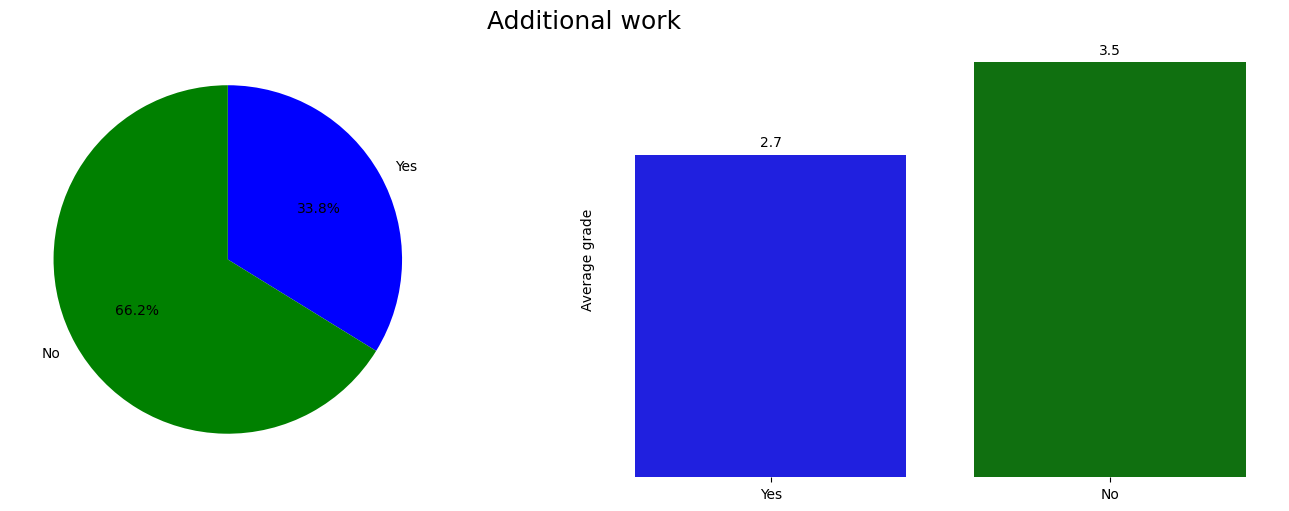

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')


order = list(attr_map['work'].values())
data = df['work'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('work')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Additional work', fontsize=18)
plt.show()

<ipython-input-116-bbffcc689667>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-116-bbffcc689667>:20: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


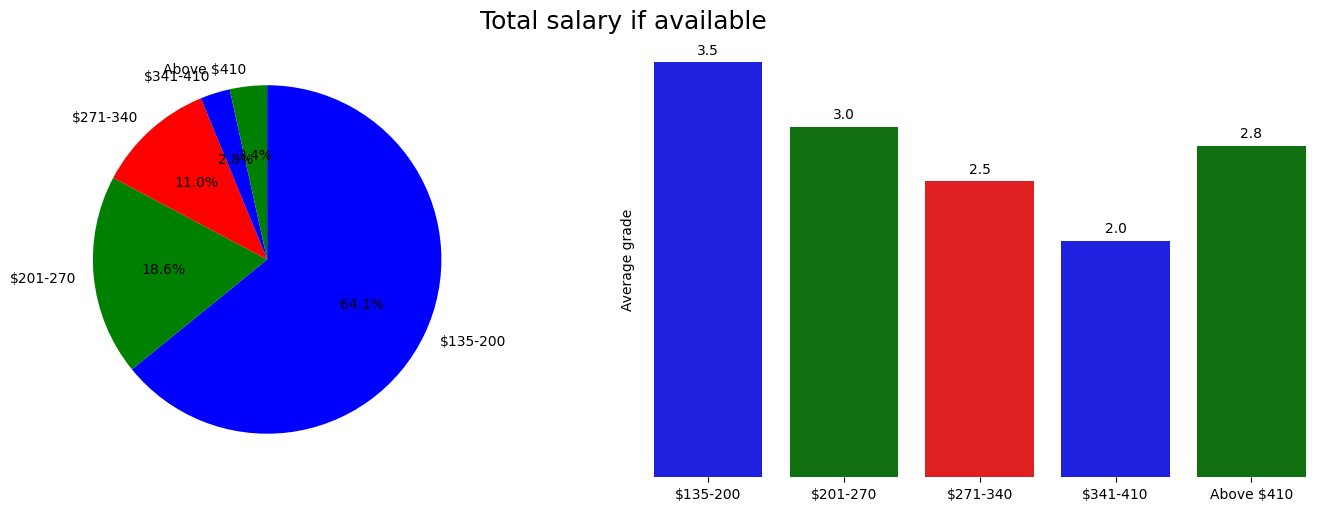

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['salary'].values())
data = df['salary'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('salary')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Total salary if available', fontsize=18)
plt.show()

<ipython-input-115-36e34ec95198>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-115-36e34ec95198>:21: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


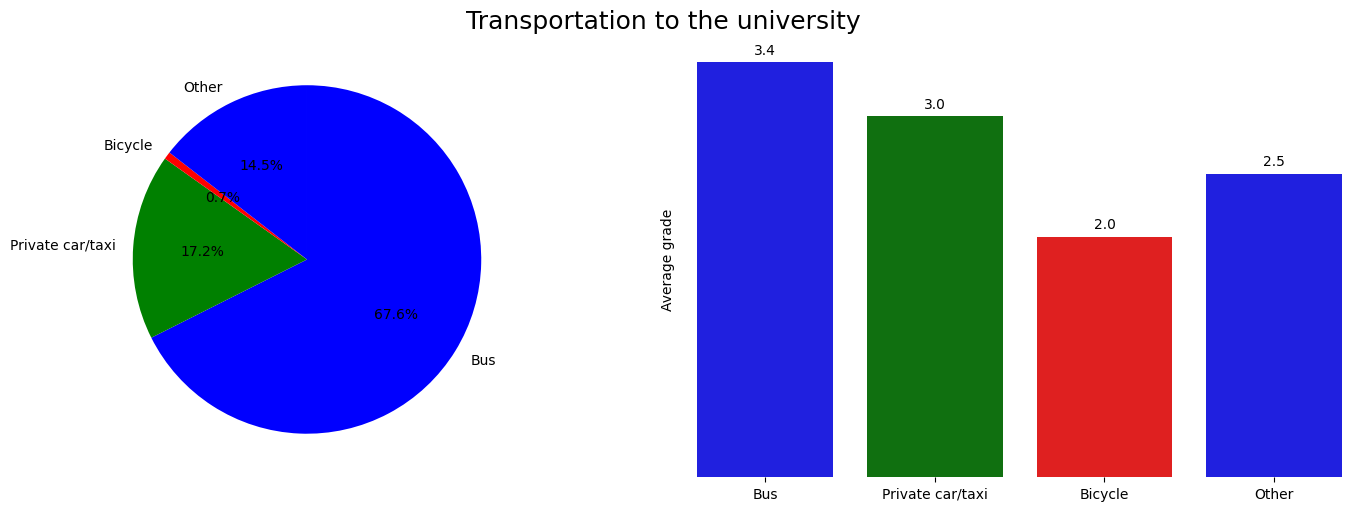

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')


order = list(attr_map['transport'].values())
data = df['transport'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('transport')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Transportation to the university', fontsize=18)
plt.show()

<ipython-input-114-5db37e199a3b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-114-5db37e199a3b>:20: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


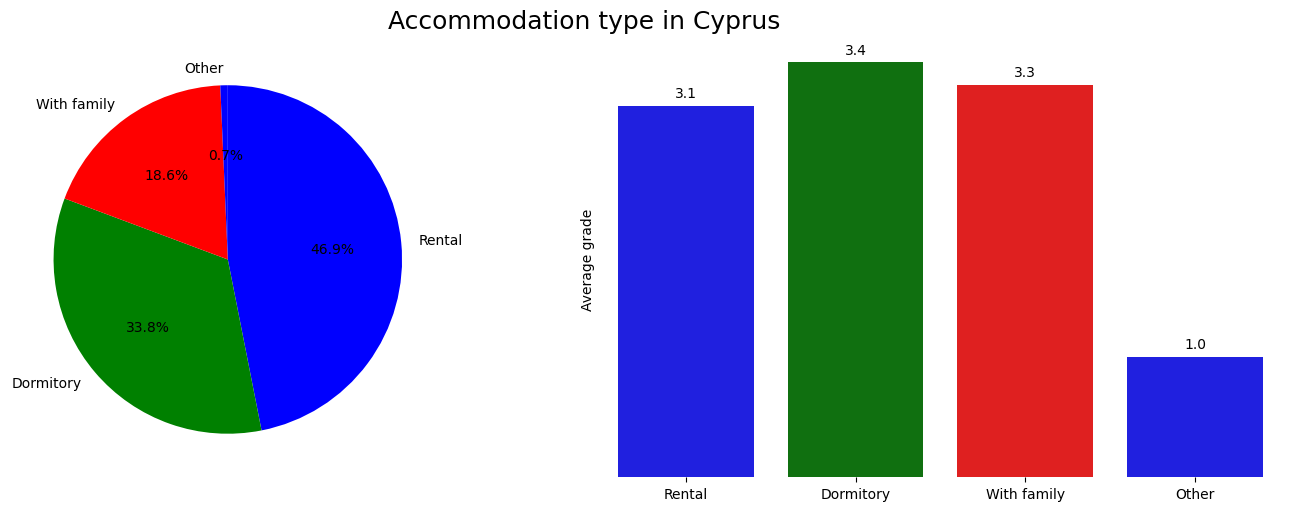

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['living'].values())
data = df['living'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('living')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Accommodation type in Cyprus', fontsize=18)
plt.show()

<ipython-input-113-a9bbcba07889>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-113-a9bbcba07889>:20: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


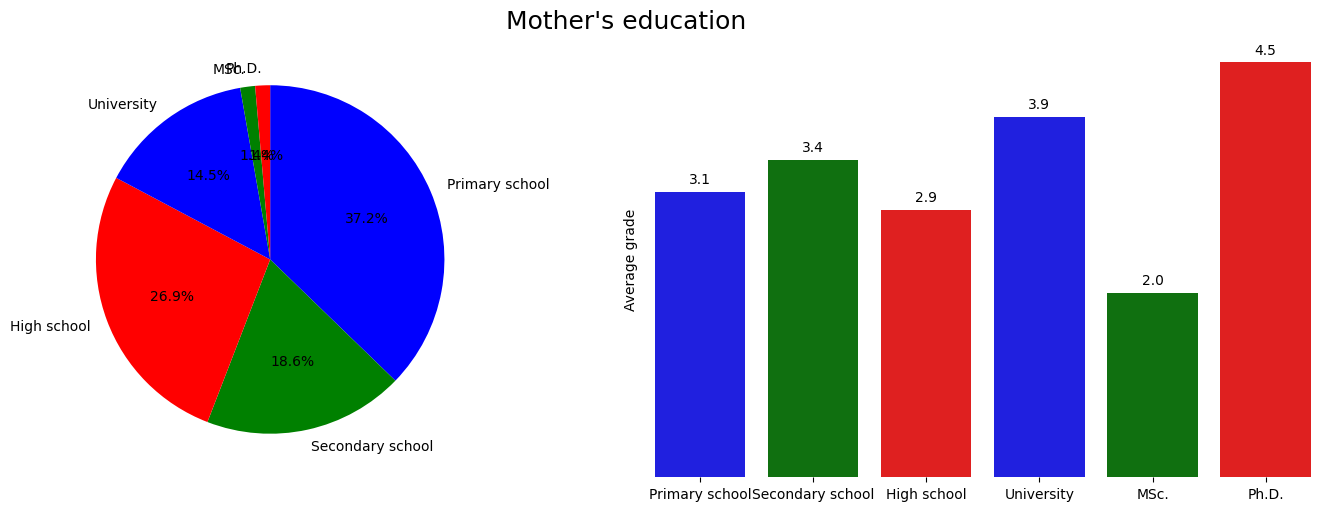

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['mother_edu'].values())
data = df['mother_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('mother_edu')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Mother\'s education', fontsize=18)
plt.show()

<ipython-input-112-5d24666dd685>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-112-5d24666dd685>:20: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


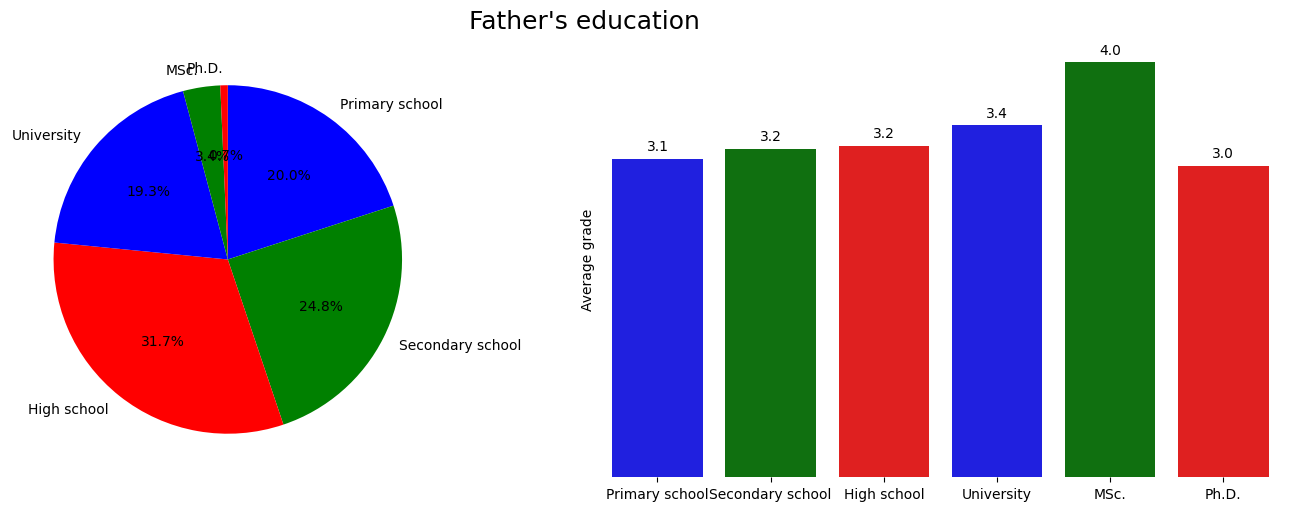

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['father_edu'].values())
data = df['father_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('father_edu')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Father\'s education', fontsize=18)
plt.show()

<ipython-input-111-c519dafef4c6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-111-c519dafef4c6>:19: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


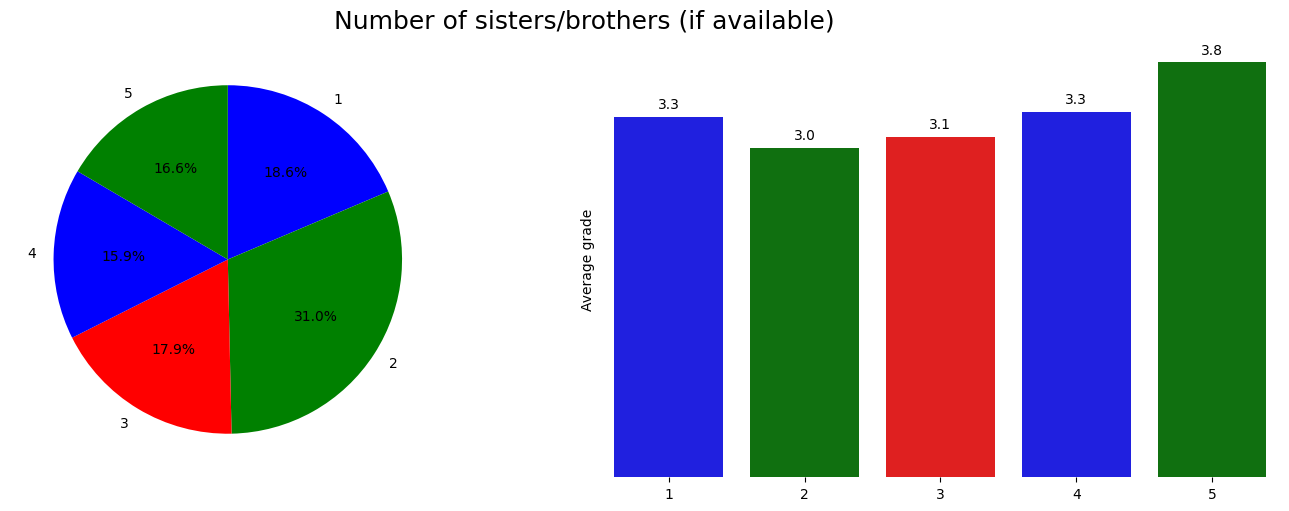

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

data = df['#_siblings'].value_counts(normalize=True) * 100
data = data.loc[list(range(1, 6))]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('#_siblings')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Number of sisters/brothers (if available)', fontsize=18)
plt.show()

<ipython-input-110-aeae6b5ddf80>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-110-aeae6b5ddf80>:21: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


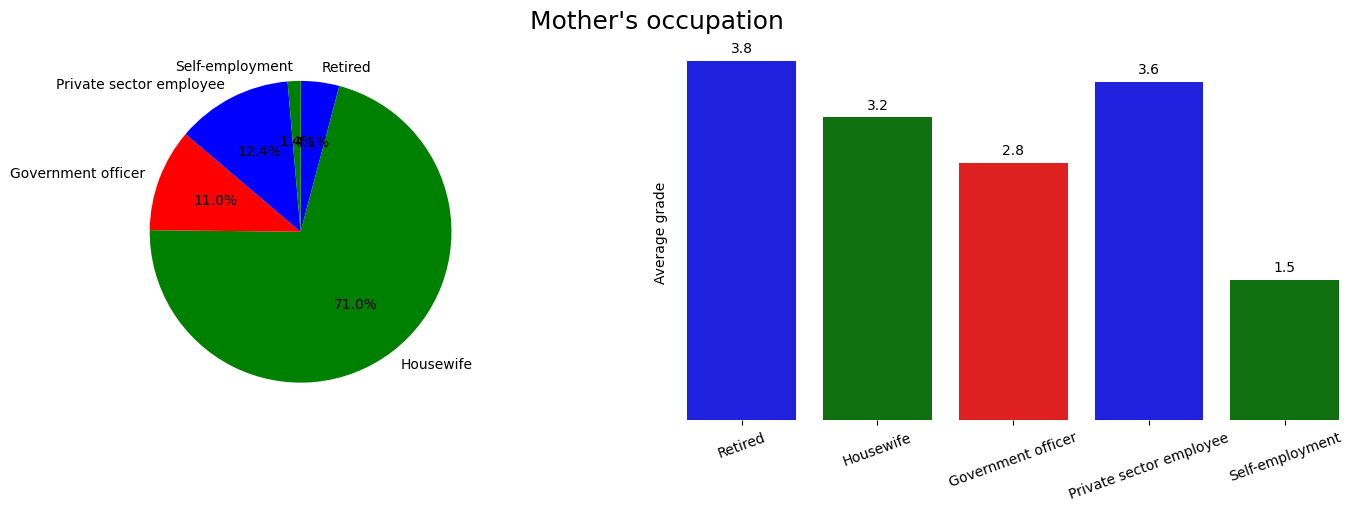

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['mother_job'].values())
order.remove('Other')
data = df['mother_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('mother_job')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.xticks(rotation=20)
plt.yticks([])
plt.box(False)

fig.suptitle('Mother\'s occupation', fontsize=18)
plt.show()

<ipython-input-109-74ba7525a50f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-109-74ba7525a50f>:21: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


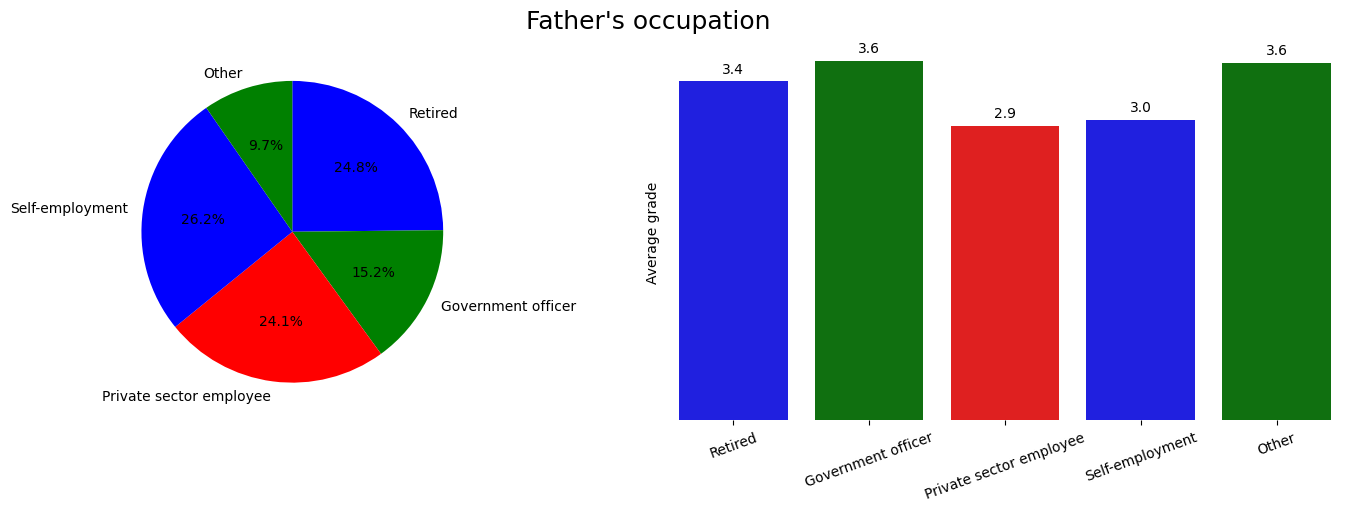

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['father_job'].values())
# order.remove('Other')
data = df['father_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('father_job')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.xticks(rotation=20)
plt.yticks([])
plt.box(False)

fig.suptitle('Father\'s occupation', fontsize=18)
plt.show()

<ipython-input-108-2822dfb1ae2b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-108-2822dfb1ae2b>:21: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


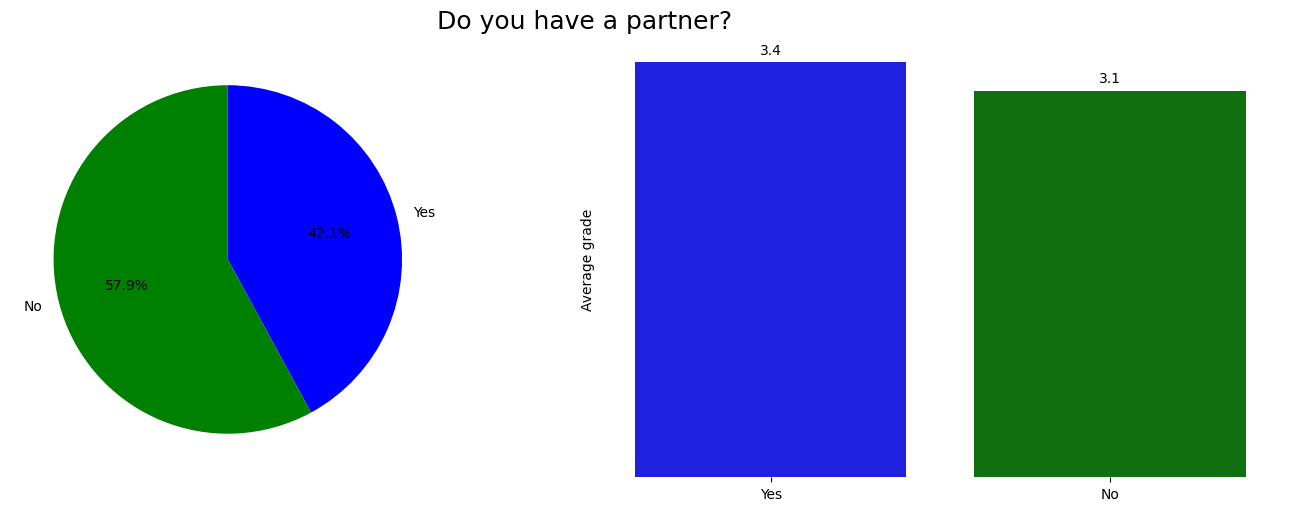

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['partner'].values())
data = df['partner'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('partner')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Do you have a partner?', fontsize=18)
plt.show()

<ipython-input-107-a0dfc9e95555>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-107-a0dfc9e95555>:21: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


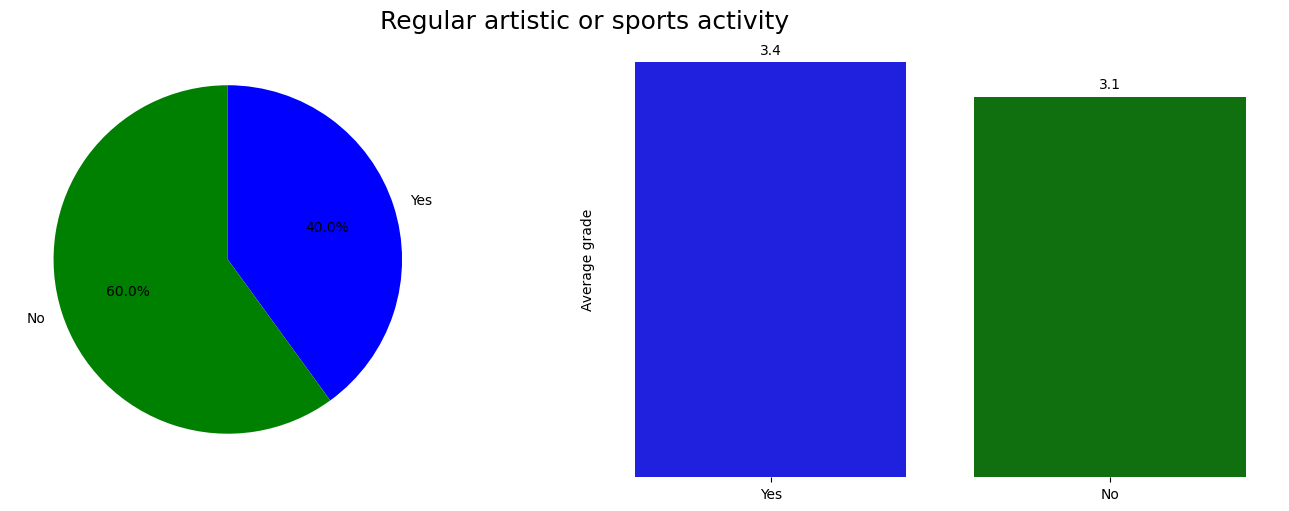

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['activity'].values())
data = df['activity'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('activity')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Regular artistic or sports activity', fontsize=18)
plt.show()

<ipython-input-106-79bb84f388d9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-106-79bb84f388d9>:20: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


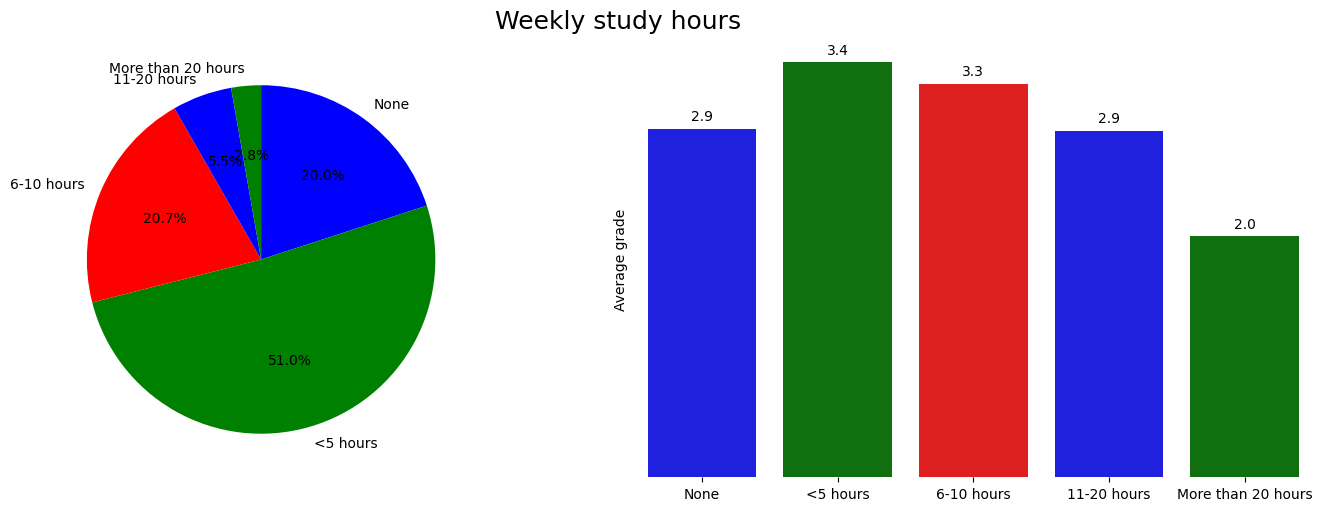

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['study_hrs'].values())
data = df['study_hrs'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('study_hrs')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Weekly study hours', fontsize=18)
plt.show()

<ipython-input-105-74cf40fc36ea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


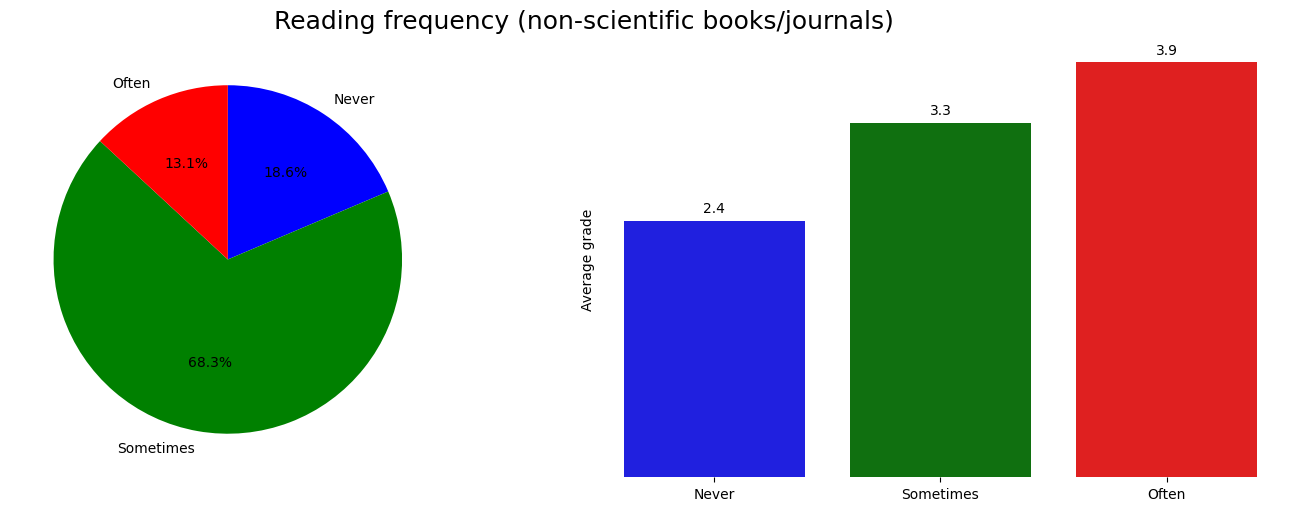

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['read_freq'].values())
data = df['read_freq'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('read_freq')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Reading frequency (non-scientific books/journals)', fontsize=18)
plt.show()

<ipython-input-104-4ffed9ca2a2d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


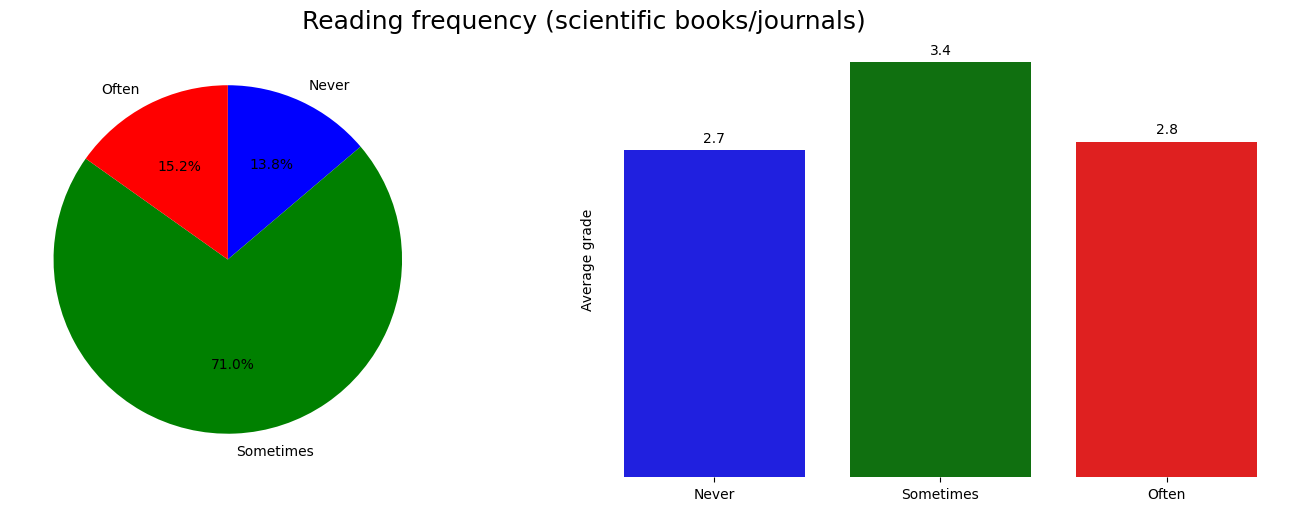

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['read_freq_sci'].values())
data = df['read_freq_sci'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('read_freq_sci')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Reading frequency (scientific books/journals)', fontsize=18)
plt.show()

<ipython-input-82-88970ccc4328>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, palette=palette)
<ipython-input-82-88970ccc4328>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, palette=palette)


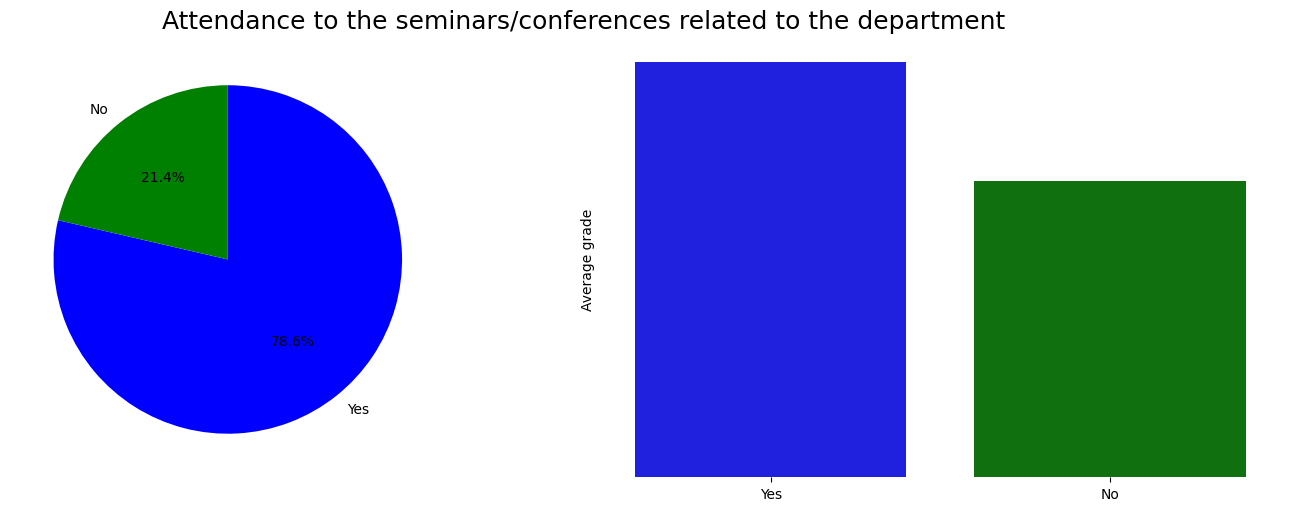

In [ ]:


data = df['attend_dept'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = df.groupby('attend_dept')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Attendance to the seminars/conferences related to the department', fontsize=18)
plt.show()

<ipython-input-103-57d42d16cea2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


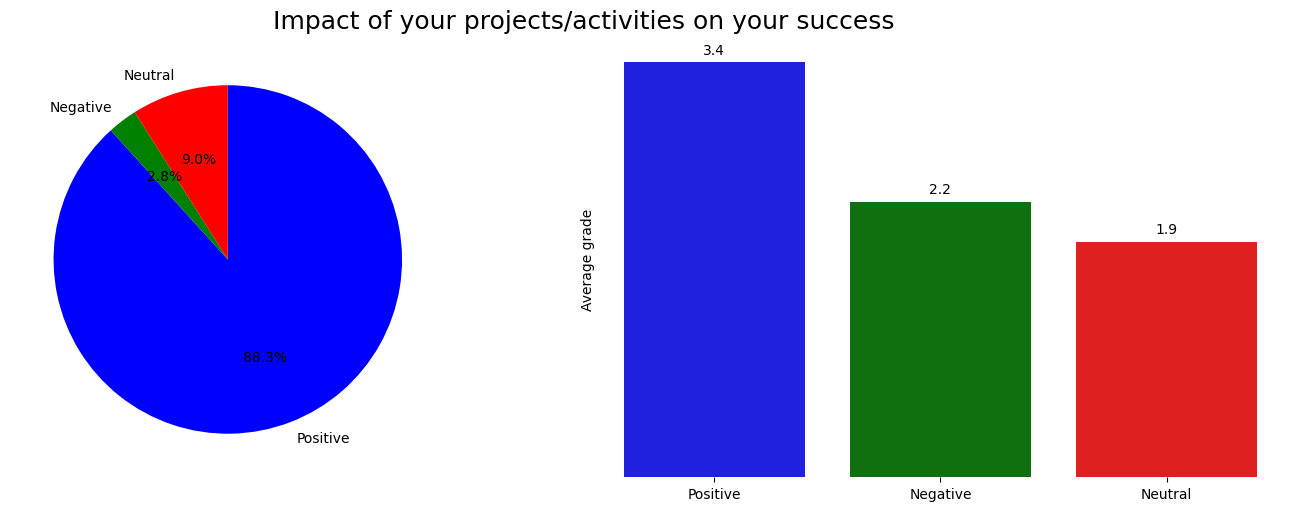

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['impact'].values())
data = df['impact'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('impact')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Impact of your projects/activities on your success', fontsize=18)
plt.show()

<ipython-input-102-50fb27d0704a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


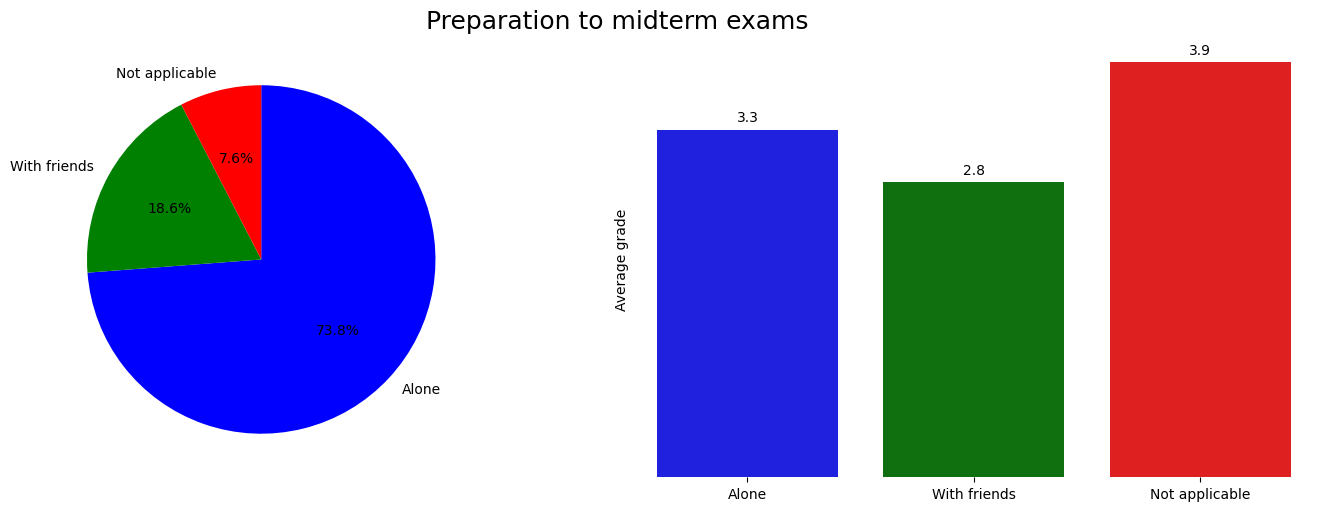

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['prep_study'].values())
data = df['prep_study'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('prep_study')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Preparation to midterm exams', fontsize=18)
plt.show()

<ipython-input-101-cf0cdb82bb21>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


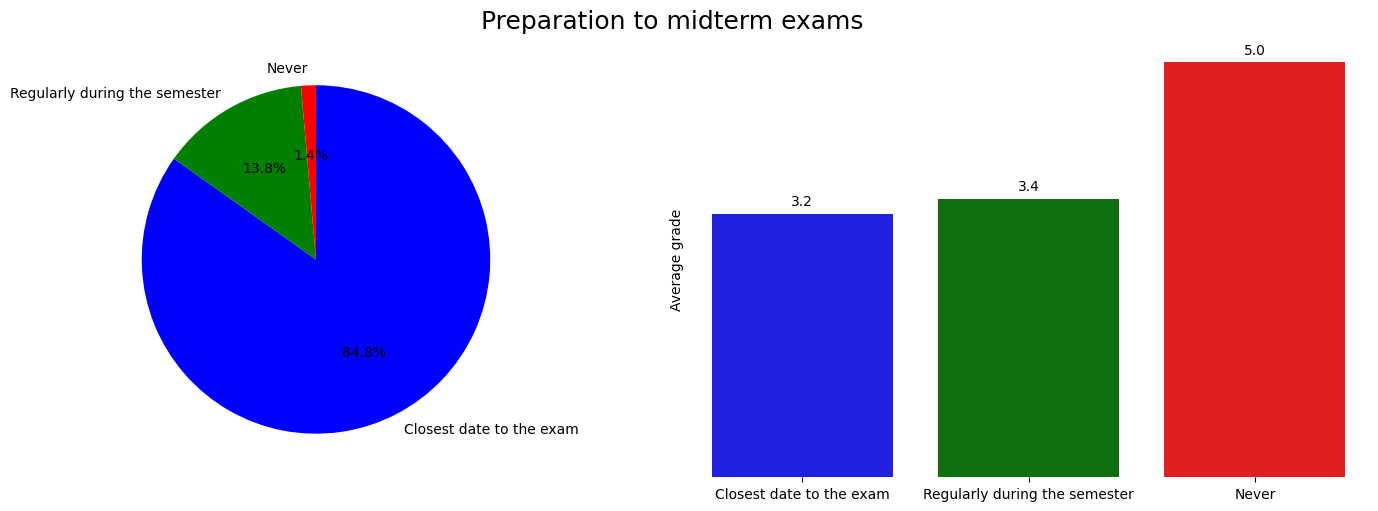

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['prep_exam'].values())
data = df['prep_exam'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('prep_exam')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Preparation to midterm exams', fontsize=18)
plt.show()

<ipython-input-100-1ea971e4c075>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
<ipython-input-100-1ea971e4c075>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


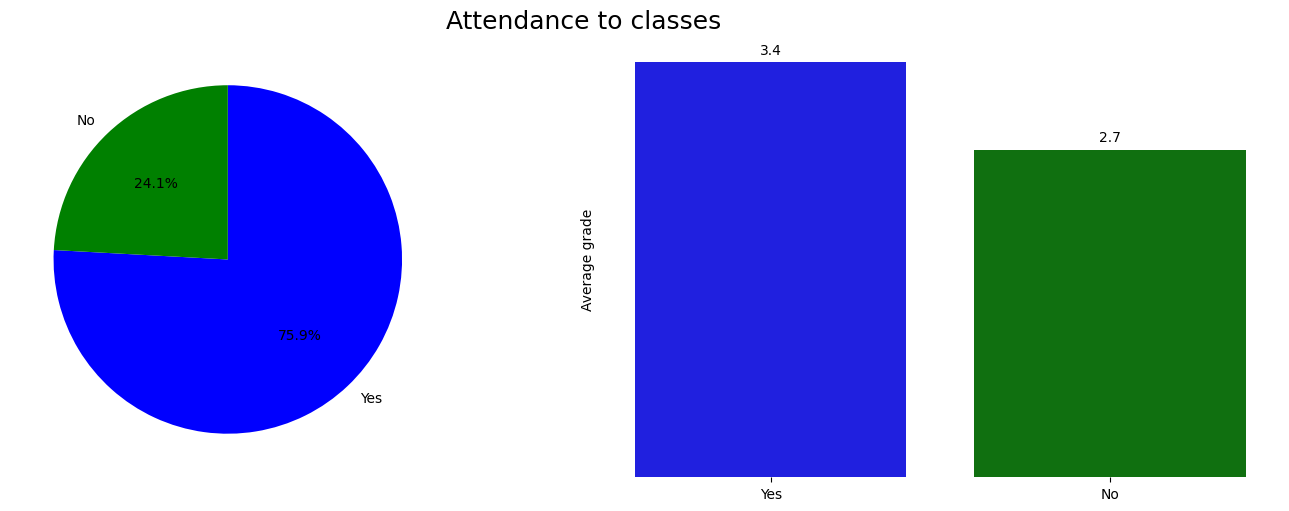

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['attend'].values())
data = df['attend'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('attend')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Attendance to classes', fontsize=18)
plt.show()

<ipython-input-99-08433ab12150>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


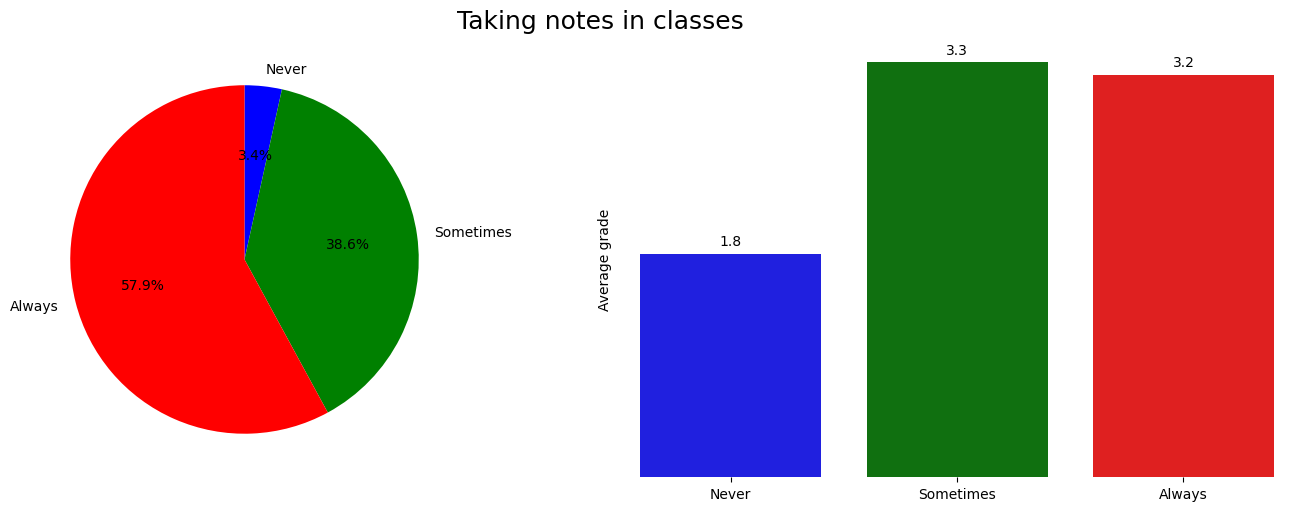

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['notes'].values())
data = df['notes'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('notes')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Taking notes in classes', fontsize=18)
plt.show()

<ipython-input-98-1c2625ae06d6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


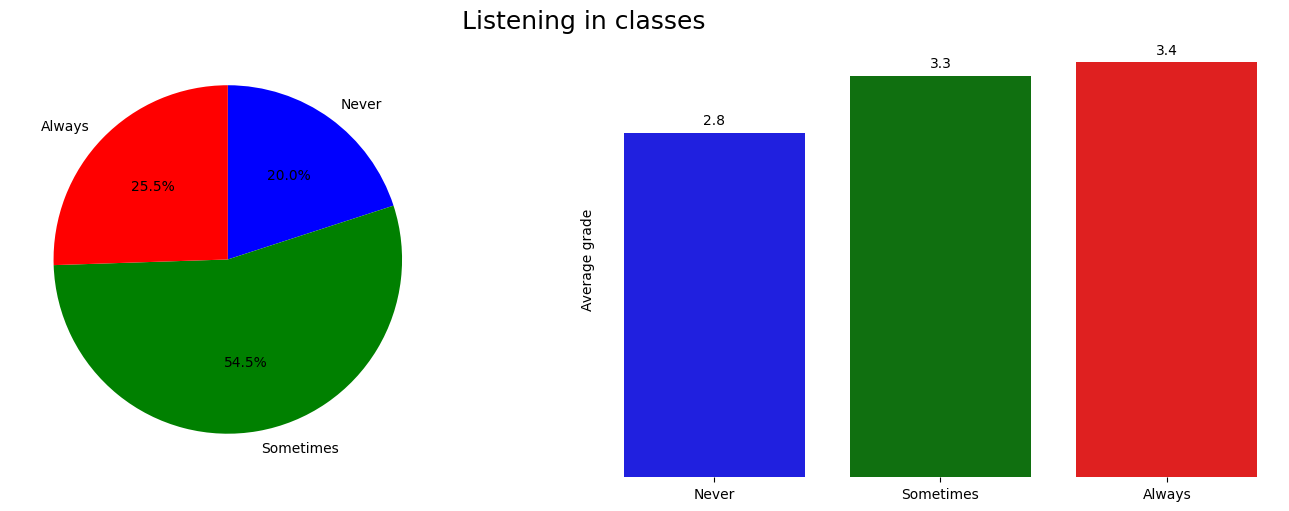

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['listens'].values())
data = df['listens'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('listens')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Listening in classes', fontsize=18)
plt.show()

<ipython-input-97-023492b73910>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


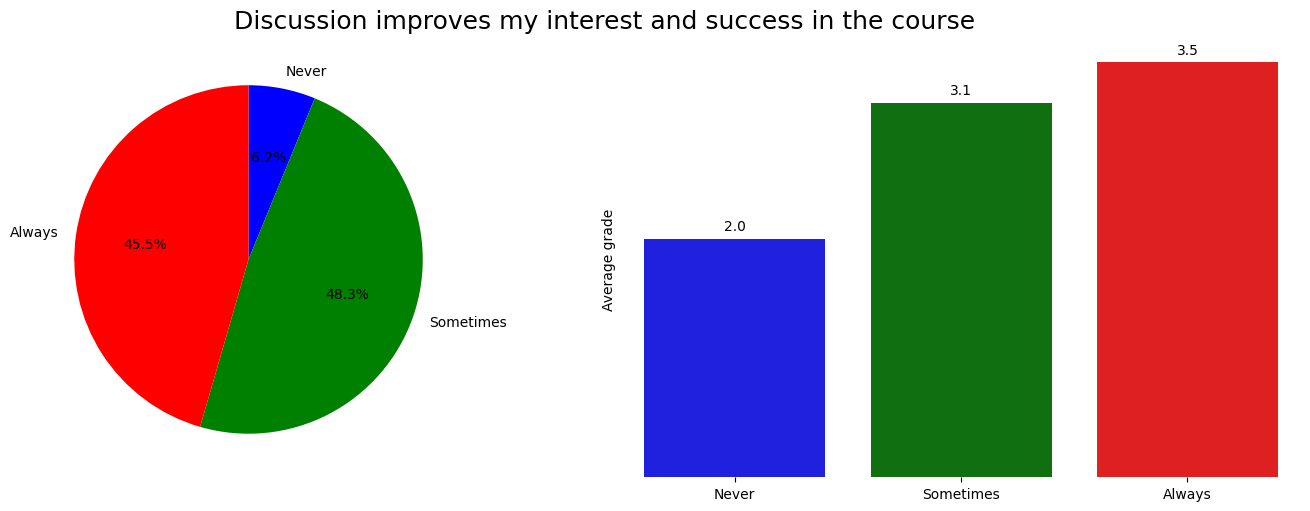

In [ ]:
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['likes_discuss'].values())
data = df['likes_discuss'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('likes_discuss')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Discussion improves my interest and success in the course', fontsize=18)
plt.show()

<ipython-input-96-4192ae71890e>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)


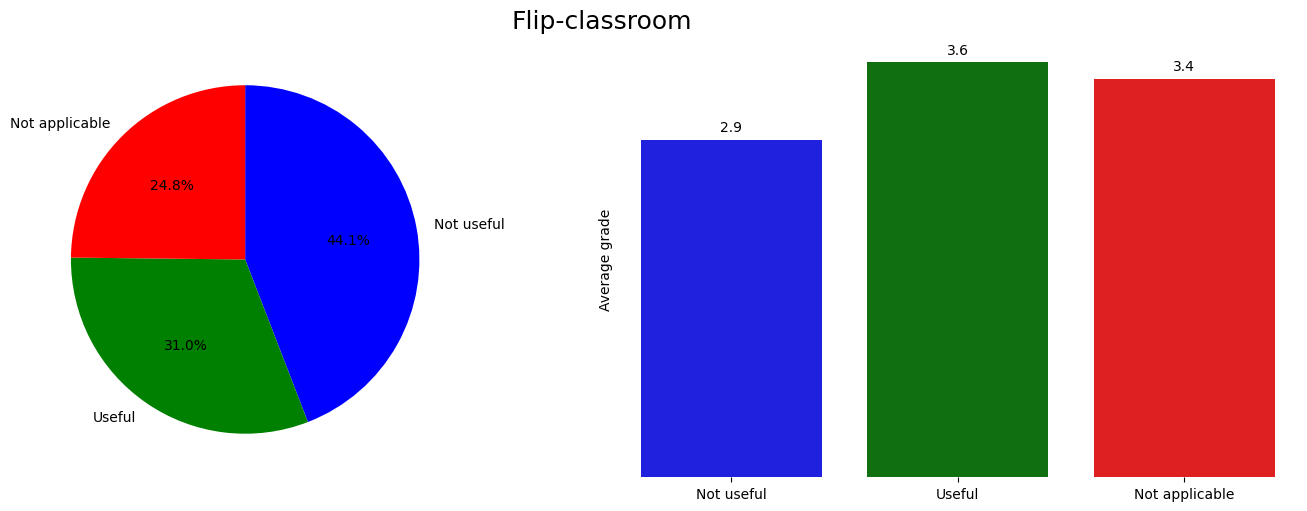

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your palette here with the appropriate number of colors based on the number of categories in your data
palette = ['blue', 'green', 'red']  # Add more colors as needed

# Define annotate_bar_plot function
def annotate_bar_plot(barplot):
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

order = list(attr_map['classroom'].values())
data = df['classroom'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = df.groupby('classroom')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Flip-classroom', fontsize=18)
plt.show()



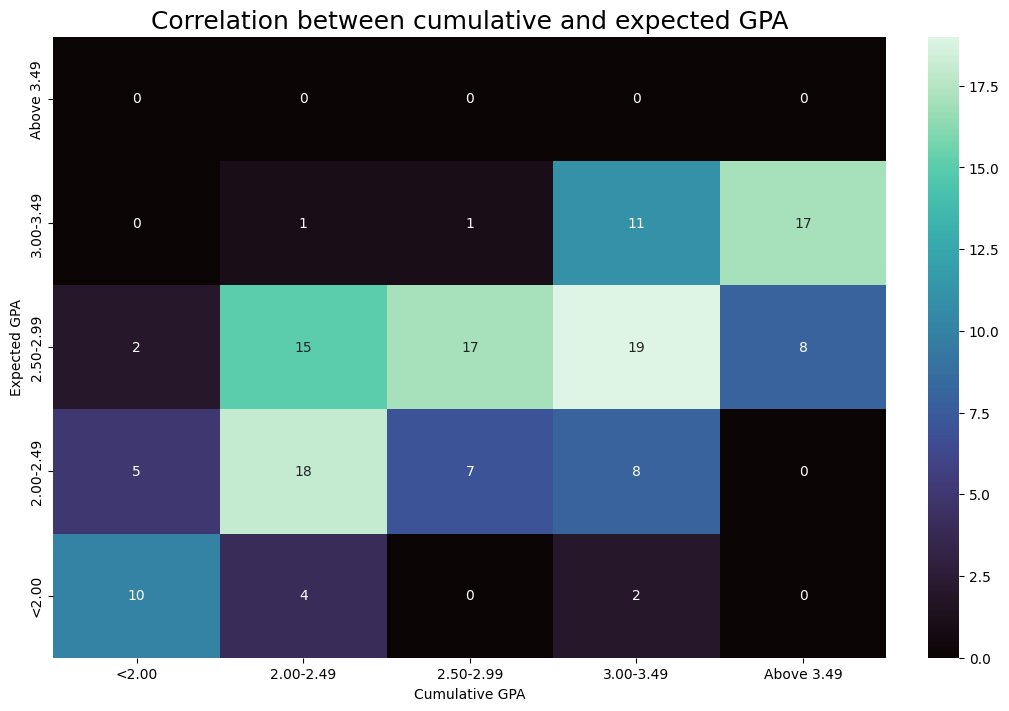

In [ ]:
order = list(attr_map['cuml_gpa'].values())
gpa_sort_key = {v:k for k, v in attr_map['cuml_gpa'].items()}

data = df.groupby(['cuml_gpa', 'exp_gpa']).size().reset_index()
data.sort_values(by=['cuml_gpa', 'exp_gpa'], key=lambda x: x.map(gpa_sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='cuml_gpa', columns='exp_gpa').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
data[order[-1]] = 0
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Cumulative GPA')
plt.ylabel('Expected GPA')
plt.title('Correlation between cumulative and expected GPA', fontsize=18)
plt.show()

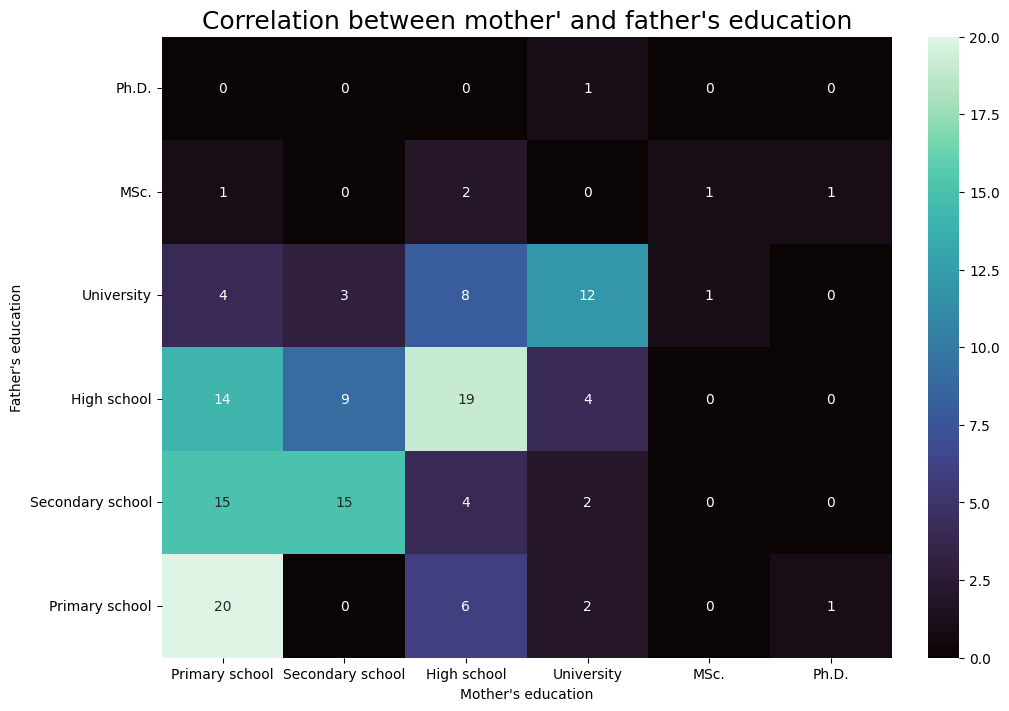

In [ ]:
order = list(attr_map['mother_edu'].values())
sort_key = {v:k for k, v in attr_map['mother_edu'].items()}

data = df.groupby(['mother_edu', 'father_edu']).size().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], key=lambda x: x.map(sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Correlation between mother\' and father\'s education', fontsize=18)
plt.show()

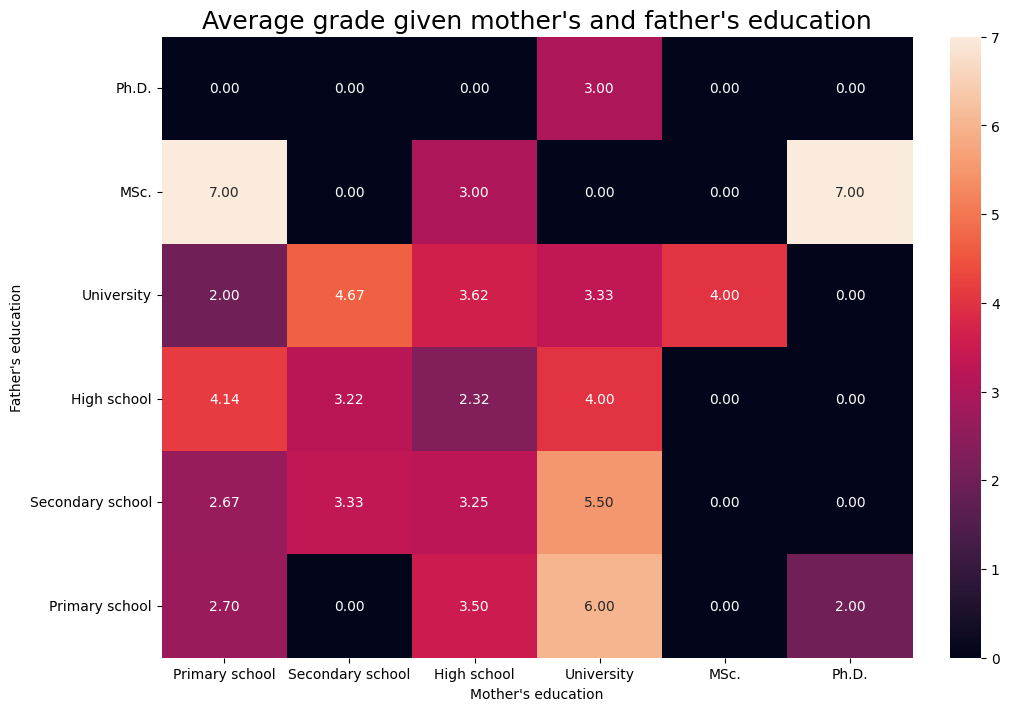

In [ ]:
order = list(attr_map['mother_edu'].values())
sort_key = {v:k for k, v in attr_map['mother_edu'].items()}

data = df.groupby(['mother_edu', 'father_edu'])['grade'].mean().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], key=lambda x: x.map(sort_key), inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T, annot=True, fmt='.2f')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Average grade given mother\'s and father\'s education', fontsize=18)
plt.show()